# EDA on DataSet

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# static variable
line_break = '------------------------------------------------------------------------------------------------------------'

In [20]:
def read_csv(csv_file):
    """
    Read CSV file and return the dataframe
    """
    df = pd.read_csv(csv_file)
    return df

In [23]:
train_peptides = read_csv('train_peptides.csv')       
train_peptides_shape =train_peptides.shape
train_peptides_info = train_peptides.info()
train_peptides_describe = train_peptides.describe()
train_peptides_head = train_peptides.head(10)

print(f'shape of peptide file:\n{train_peptides_shape}\n\n{line_break}')
print(f'sameple for peptide data:\n {train_peptides_head}\n\n{line_break}')

# checking for the missing data
print(f'missing peptides data:\n{train_peptides.isna().sum()}\n\n{line_break}')

# check how many unique patient
num_unique_patients = train_peptides['patient_id'].nunique()
num_unique_visit_month = train_peptides['visit_month'].nunique()
num_unique_uniprot = train_peptides['UniProt'].nunique()
num_unique_peptide = train_peptides['Peptide'].nunique()
print("Number of unique patients:", num_unique_patients)
print("Number of unique visit month:", num_unique_visit_month)
print("Number of unique uniprot:", num_unique_uniprot)
print("Number of unique peptide:", num_unique_peptide)

print('Count the number of unique visit_month for each patient_id')
visit_counts = train_peptides.groupby('patient_id')['visit_month'].nunique()
# Calculate the min, max, mean, and median of the visit counts
visit_stats = visit_counts.agg(['min', 'max', 'mean', 'median'])
# Print the visit statistics
print(f'visit stats:\n{visit_stats}\n\n{line_break}')

print('Count the number of unique peptide for each patient_id')
peptide_counts = train_peptides.groupby('patient_id')['Peptide'].nunique()
# Calculate the min, max, mean, and median of the visit counts
peptide_stats = peptide_counts.agg(['min', 'max', 'mean', 'median'])
# Print the visit statistics
print(f'peptide stats:\n{peptide_stats}\n\n{line_break}')


# Count the number of unique patients for each peptide
peptide_patient_counts = train_peptides.groupby('Peptide')['patient_id'].nunique()
# Sort the counts in descending order
peptide_patient_counts = peptide_patient_counts.sort_values(ascending=False)
# Print the result
print(f'count of peptide group by patient id:\n{peptide_patient_counts}\n\n{line_break}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB
shape of peptide file:
(981834, 6)

------------------------------------------------------------------------------------------------------------
sameple for peptide data:
   visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55 

In [11]:
train_proteins = read_csv('train_proteins.csv')     
train_proteins_shape = train_proteins.shape
train_proteins_info = train_proteins.info()
train_proteins_describe = train_proteins.describe()
train_proteins_head = train_proteins.head(10)

print(f'shape of proteins file:\n{train_proteins_shape}\n\n{line_break}')
print(f'sameple for proteins data:\n {train_proteins_head}\n\n{line_break}')

# checking for the missing data
print(f'missing clinical data:\n{train_proteins.isna().sum()}\n\n{line_break}')

# check how many unique patient
num_unique_patients = train_proteins['patient_id'].nunique()
num_unique_visit_month = train_proteins['visit_month'].nunique()
num_unique_uniprot = train_proteins['UniProt'].nunique()
num_unique_npx = train_proteins['NPX'].nunique()
print("Number of unique patients:", num_unique_patients)
print("Number of unique visit month:", num_unique_visit_month)
print("Number of unique uniprot:", num_unique_uniprot)
print("Number of unique NPX:", num_unique_npx)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB
shape of proteins file:
(232741, 5)

------------------------------------------------------------------------------------------------------------
sameple for proteins data:
   visit_id  visit_month  patient_id UniProt        NPX
0     55_0            0          55  O00391   11254.30
1     55_0            0          55  O00533  732430.00
2     55_0            0          55  O00584   39585.80
3     55_0            0          55  O14498   41526.90
4     55_0            0          55  O14773   31238.00
5     55_0            0

In [25]:
train_clinical_data = read_csv('train_clinical_data.csv')
train_clinical_shape = train_clinical_data.shape
train_clinical_info = train_clinical_data.info()
train_clinical_describe = train_clinical_data.describe()
print(f'shape of clinical data:\n{train_clinical_shape}\n\n{line_break}')
print(f'info on clinical data:\n{train_clinical_info}\n\n{line_break}')
print(f'describe clinical data:\n{train_clinical_describe}\n\n{line_break}')

# since there are some missing data for upd23b_clinical_state_on_medication, updrs_2, updrs_3, updrs_4 based on describe
# we are going to fill it with unknown
# we are only going to fill upd23b_clinical_state_on_medication cause we will use the rest to calculate corr
#train_clinical_data['upd23b_clinical_state_on_medication'] = train_clinical_data['upd23b_clinical_state_on_medication'].fillna('Unknown')

# checking for the missing data based on describe to validate that we does fill it all now
print(f'missing clinical data:\n{train_clinical_data.isna().sum()}\n\n{line_break}')

train_clinical_head = train_clinical_data.head(10)
print(train_clinical_head)

# check how many unique patient
print('\n\n---------------------------------------------------')
num_unique_patients = train_clinical_data['patient_id'].nunique()
num_unique_visit_month = train_proteins['visit_month'].nunique()
print("Number of unique patients:", num_unique_patients)
print("Number of unique visit month:", num_unique_visit_month)

print('Count the number of unique visit_month for each patient_id')
visit_counts = train_clinical_data.groupby('patient_id')['visit_month'].nunique()
# Calculate the min, max, mean, and median of the visit counts
visit_stats = visit_counts.agg(['min', 'max', 'mean', 'median'])
# Print the visit statistics
print(f'visit stats is:\n{visit_stats}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB
shape of clinical data:
(2615, 8)

------------------------------------------------------------------------------------------------------------
info on clinical data:
Non

In [15]:
# check if there is a correlation between Parkinson's disease and protein expression
# Merge the dataframes on 'visit_id', 'visit_month', and 'patient_id'
df_merged = pd.merge(train_proteins, train_clinical_data, on=['visit_id', 'visit_month', 'patient_id'])
df_merged_shape = df_merged.shape
df_merged_info = df_merged.info()
df_merged_describe = df_merged.describe()

print(f'shape of df_merged data:\n{df_merged}\n\n{line_break}')
print(f'info on df_merged data:\n{df_merged_info}\n\n{line_break}')
print(f'describe df_merged data:\n{df_merged_describe}\n\n{line_break}')

# check how many unique patient
print('\n\n---------------------------------------------------')
num_unique_patients = df_merged['patient_id'].nunique()
num_unique_visit_month = df_merged['visit_month'].nunique()
print("Number of unique patients:", num_unique_patients)
print("Number of unique visit month:", num_unique_visit_month)

print('Count the number of unique visit_month for each patient_id')
visit_counts = df_merged.groupby('patient_id')['visit_month'].nunique()
# Calculate the min, max, mean, and median of the visit counts
visit_stats = visit_counts.agg(['min', 'max', 'mean', 'median'])
# Print the visit statistics
print(f'visit stats is:\n{visit_stats}updrs_2')

print('Count the number of unique visit_month for each patient_id')
visit_counts = df_merged.groupby('patient_id')['visit_month'].nunique()
# Calculate the min, max, mean, and median of the visit counts
visit_stats = visit_counts.agg(['min', 'max', 'mean', 'median'])
# Print the visit statistics
print(f'visit stats is:\n{visit_stats}\n\n{line_break}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223268 entries, 0 to 223267
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             223268 non-null  object 
 1   visit_month                          223268 non-null  int64  
 2   patient_id                           223268 non-null  int64  
 3   UniProt                              223268 non-null  object 
 4   NPX                                  223268 non-null  float64
 5   updrs_1                              223268 non-null  float64
 6   updrs_2                              223268 non-null  float64
 7   updrs_3                              221135 non-null  float64
 8   updrs_4                              118208 non-null  float64
 9   upd23b_clinical_state_on_medication  223268 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 18.7+ MB
shape of df_merged dat

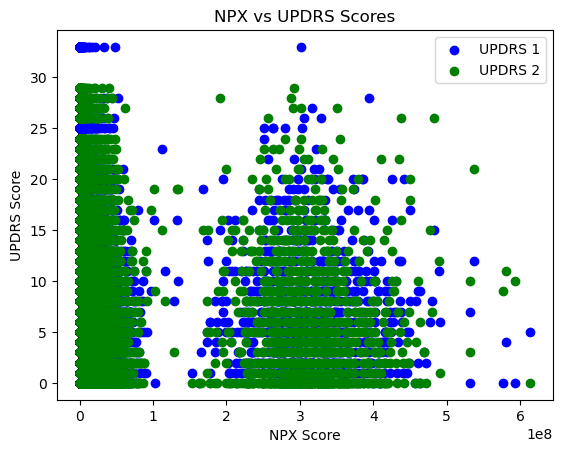

In [17]:
# Create a scatter plot
plt.scatter(df_merged['NPX'], df_merged['updrs_1'], color='blue', label='UPDRS 1')
plt.scatter(df_merged['NPX'], df_merged['updrs_2'], color='green', label='UPDRS 2')
#plt.scatter(df_merged['NPX'], df_merged['updrs_3'], color='red', label='UPDRS 3')
#plt.scatter(df_merged['NPX'], df_merged['updrs_4'], color='purple', label='UPDRS 4')

# Add labels and legend
plt.xlabel('NPX Score')
plt.ylabel('UPDRS Score')
plt.title('NPX vs UPDRS Scores')
plt.legend()

# Show the plot
plt.show()

Scatter plot does not show any correlaltion between NPX score and the UPDRS score. Hence, we are going to build a correlation metric to check if there are any value that we are missing based on the scatter plot above.

In [ ]:
import seaborn as sns

# Create a correlation matrix between the variables
corr_matrix = df_merged[['NPX', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()

# Create a heatmap with annotated correlation values and a colorbar legend
sns.set(style="white")
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, cbar=True, ax=ax)
ax.set_title('Correlation between NPX and UPDRS scores')
plt.show()

We can't really find any correlation between NPX and updrs score. We will check the relatin between each UniProt and the updrs score now. based on the EDA above, there are 227 UniProt

In [ ]:
protein_dict = {}
# protein_dict is in form of {protein: {visit_id: npx}}
for protein, group in train_proteins.groupby("UniProt"):
    protein_dict[protein] = dict(zip(group["visit_id"], group["NPX"]))

peptide_dict = {}
# peptide_dict is in form of {peptide: {visit_id: peptideabundance}}
for peptide, group in train_peptides.groupby("Peptide"):
    peptide_dict[peptide] = dict(zip(group["visit_id"], group["PeptideAbundance"]))

protein_df = pd.DataFrame.from_dict(protein_dict)
peptide_df = pd.DataFrame.from_dict(peptide_dict)

merged_df = pd.concat([train_clinical_data.set_index('visit_id'), protein_df, peptide_df], axis=1).reset_index()
merged_df_shape = merged_df.shape
merged_df_info = merged_df.info
merged_df_describe = merged_df.describe()
merged_df_column = merged_df.columns

print(f'shape of df_merged data:\n{merged_df_shape}\n\n{line_break}')
print(f'info on df_merged data:\n{merged_df_info}\n\n{line_break}')
print(f'describe df_merged data:\n{merged_df_describe}\n\n{line_break}')
print(f'describe df_merged data:\n{merged_df_column}\n\n{line_break}')



Feature Selection cause now we have 1201 columns that consist of each proteins and each peptide.
We will try to analyze and check which protein / peptide has high correlation to the patient ID

In [ ]:
corr_matrix = merged_df.corr()
updrs1_corr = corr_matrix['updrs_1'].drop('updrs_1')
updrs1_corr_abs = updrs1_corr.abs()
updrs1_corr_abs_sorted = updrs1_corr_abs.sort_values(ascending=False)
print(updrs1_corr_abs_sorted)

In [ ]:
updrs2_corr = corr_matrix['updrs_2'].drop('updrs_2')
updrs2_corr_abs = updrs2_corr.abs()
updrs2_corr_abs_sorted = updrs2_corr_abs.sort_values(ascending=False)
print(updrs2_corr_abs_sorted)

In [ ]:
updrs3_corr = corr_matrix['updrs_3'].drop('updrs_3')
updrs3_corr_abs = updrs3_corr.abs()
updrs3_corr_abs_sorted = updrs3_corr_abs.sort_values(ascending=False)
print(updrs3_corr_abs_sorted)

In [ ]:
# Get the top 50 columns with the highest correlation to updrs_1
top50_updrs1_corr = updrs1_corr_abs.nlargest(75)[:].index
print(updrs1_corr[top50_updrs1_corr])

In [ ]:
# Get the top 50 columns with the highest correlation to updrs_1
top50_updrs2_corr = updrs2_corr_abs.nlargest(75)[:].index
print(updrs2_corr[top50_updrs2_corr])

In [ ]:
# Get the top 50 columns with the highest correlation to updrs_1
top50_updrs3_corr = updrs3_corr_abs.nlargest(75)[:].index
print(updrs3_corr[top50_updrs3_corr])

In [ ]:
# find the intersection of the index of correlation dataframes for 'updrs_1', 'updrs_2', and 'updrs_3'
common_cols = set(top50_updrs1_corr).intersection(top50_updrs2_corr).intersection(top50_updrs3_corr)

# print the common columns
print(common_cols)


In [ ]:
print(len(common_cols))

In [ ]:
# create an empty dataframe with common_cols as the index and 'updrs_1', 'updrs_2', 'updrs_3' as the columns
common_corr_df = pd.DataFrame(index=common_cols, columns=['updrs_1', 'updrs_2', 'updrs_3'])

# assuming the column name is 'column_name'
corr_value = top50_updrs1_corr.loc['O00533', 'updrs_1']
print(corr_value)
